
ITNPAI1 - Deep Learning for Vision and NLP (2022/3)


Image Classification

# *Problem definition*

Our project will focus on image Classification.
Having images from two cities (Lagos and Port harcourt). We want to build a system that can recongize a given set of images according to the cars and trees from these cities. The question now is can we make a system that can possibly classify the image of cars from Lagos  and  trees from Port harcourt correctly?
 
This is the idea behind our project, we want to build a system that is capable of reconging cars and trees from each city. The classification class here is cars and trees from Lagos and Port harcourt.

# Dataset creation

In [1]:
#Import the necessary packages:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder



# importing the libraries
import numpy as np
import torchvision
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

In [2]:
#Set up the data for City A (Lagos)
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = ImageFolder(root=r"C:\Users\user\Desktop\DATA_IMAGE\Train data", transform=data_transforms)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = ImageFolder(root=r"C:\Users\user\Desktop\DATA_IMAGE\Test data", transform=data_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [3]:
#data for city B (Port Harcourt)
# Load your dataset and split it into training and testing sets

#Define the transformations to be applied to the input images:
Data_transforms = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
train_data = datasets.ImageFolder(r"C:\Users\user\Desktop\DATA_IMAGE\Train data", transform=Data_transforms)
test_data = datasets.ImageFolder(r"C:\Users\user\Desktop\DATA_IMAGE\Test data", transform=Data_transforms)
train_load = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_load = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

Here, we are using the ImageFolder dataset from torchvision to load our data. We also apply some data augmentation techniques using transforms to resize the images, convert them to tensors, and normalize them. The batch size of 32 is used and the data is shuffled for the training set. 

The first part of the code defines the transforms to be applied to the input images. These transforms are necessary to prepare the images for the machine learning model. The transforms include resizing the image, converting it to a tensor, and normalizing the values. 

The second part of the code loads the images from the two cities into the training and testing datasets. It also specifies the batch size and whether the samples should be shuffled or not. Finally, it creates the data loaders for the training and testing sets.

# *Proposed solution*

In [4]:
# shape of training data
dataiter = iter(train_dataset)
images, labels = next(dataiter)

print(images.shape)

torch.Size([3, 224, 224])


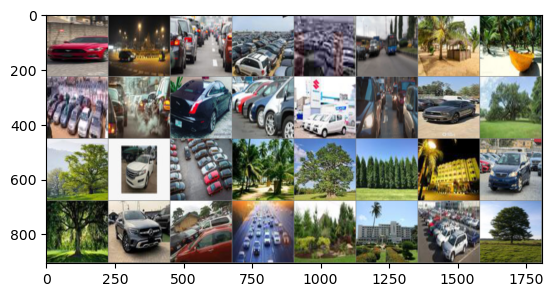

In [5]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [6]:
#Define the model:
class SingleClassClassifier(nn.Module):
    def __init__(self):
        super(SingleClassClassifier, self).__init__()
        #convolutional layers
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        #max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        #fully connected layer
        self.fc = nn.Linear(256 * 28 * 28, 1) #input size (256 * 28 * 28, 1)
        #sigmoid activation function
        self.sigmoid = nn.Sigmoid()
        
#define the forward pass
    def forward(self, x):
        #pass the input through all the layers
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        #reshape the data for fully connected layer
        x = x.view(-1, 256 * 28 * 28)
        #pass the data through the fully connected layer and sigmoid activation
        x = self.sigmoid(self.fc(x))
        #return the output
        return x

This model is a single class classifier that uses a convolutional neural network architecture with 3 convolutional layers and a max pooling layer. The input is a 3-channel image and the output is a single binary value (1 or 0). The model uses ReLu activation functions and a sigmoid activation on the output layer to classify the input image.

Here, we define a simple CNN model that takes in a 3-channel input image and outputs a single scalar value indicating whether the input image belongs to the single class or not. 

### Define  model for city B (Port Harcourt)

In [7]:
#Define the network architecture:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define convolutional layers
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Define fully-connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Pass data through convolutional layers
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        # Reshape data for passing through fully-connected layers
        x = x.view(-1, 16 * 5 * 5) # Reshape data from 2D to 1D
        # Pass data through fully-connected layers
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()